### Group 5 members: Data Science and AI

Juliet Sackey
Kaouter Labed
Monica Atuorah
Naomi Odidi
Louisa Bonsu
Oluwafunmilayo Oluyemi
Kehinde Adebisi
Nwajiunor Edgar
Kawthar Oyolola
Ndidiamaka Eneje

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
HR = pd.read_csv("HR_comma_sep.csv")
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 1.Data exploration and visualization

In [5]:
#Making assumption that 1 equals those who let the company and 0 as those who retained in the company
left = HR[HR.left==1]
left.shape

(3571, 10)

In [6]:
retained = HR[HR.left==0]
retained.shape

(11428, 10)

**Average numbers for all columns** 

In [7]:
HR.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### From above table we can draw following conclusions,
It can be deduced that 
(i) Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

(ii)Average monthly hours are higher in employees leaving the firm (199 vs 207)

(iii)Employees who are given promotion are likely to be retained at firm 


<AxesSubplot:>

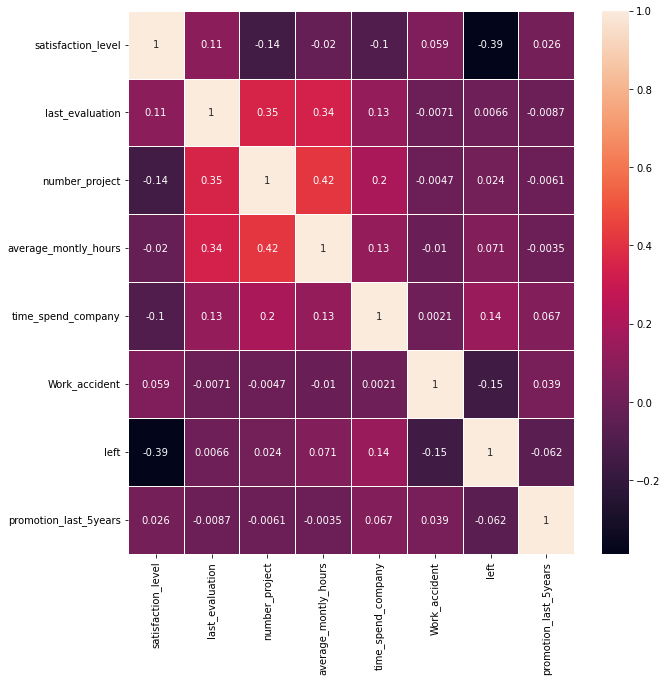

In [11]:
#Visualization using heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(HR.corr(), annot=True, linewidths=.5, ax=ax)

### 2. Plot bar charts showing impact of employee salaries on retention

Text(0, 0.5, 'count')

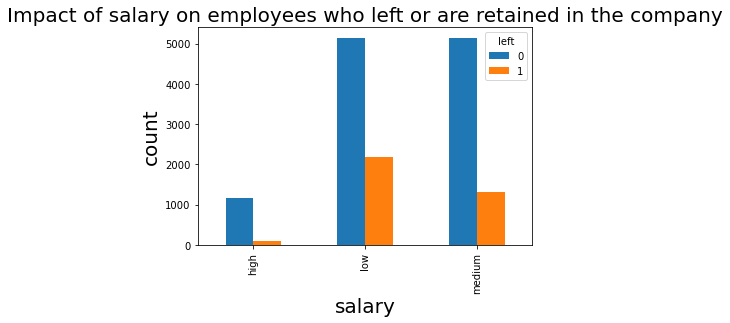

In [16]:
pd.crosstab(HR.salary,HR.left).plot(kind='bar');
plt.title('Impact of salary on employees who left or are retained in the company',fontsize=20);
plt.xlabel('salary',fontsize=20)
plt.ylabel('count',fontsize=20)

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

### 3. Plot bar charts showing corelation between department and employee retention

In [17]:
#finding the correlation between those depatment and employee retention
df=pd.DataFrame(HR,columns=['Department','left'])
df

,Department,left
0,sales,1
1,sales,1
2,sales,1
3,sales,1
4,sales,1
...,...,...
14994,support,1
14995,support,1
14996,support,1
14997,support,1


Text(0, 0.5, 'count')

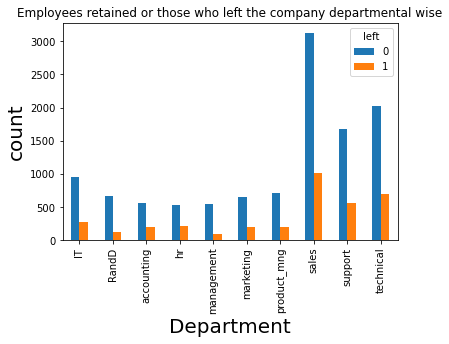

In [23]:
pd.crosstab(HR.Department,HR.left).plot(kind='bar');
plt.title('Employees retained or those who left the company departmental wise');
plt.xlabel('Department',fontsize=20)
plt.ylabel('count',fontsize=20)

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### 4. Now build logistic regression model using variables that were narrowed down in step 1

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [24]:
subdf = HR[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

In [25]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [26]:
HR_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [27]:
HR_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [28]:
HR_with_dummies.drop('salary',axis='columns',inplace=True)
HR_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [29]:
X = HR_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [30]:
y = HR.left

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### 5. Measure the accuracy of the model

In [37]:
model.score(X_test,y_test)

0.7755238095238095